<a href="https://colab.research.google.com/github/abhinov311297/Play_Store_Review_Analysis/blob/main/Seoul_Bike_Sharing_Team_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### **Project Type**    - Regression 
##### **Contribution**    - Team
##### **Team Member 1 -** Abhinov Anand-https://github.com/abhinov311297/SEOUL-RENTAL-BIKE-PREDICTION


##### **Team Member 2 -** Vivek Kumar


# **Project Name**    - **SEOUL BIKE SHARING DEMAND PREDECTION**



Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes. Data Description The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information. Attribute Information

# Variables

**Date** : year-month-day

**Rented Bike count** - Count of bikes rented at each hour

**Hour** - Hour of he day

**Temperature**-Temperature in Celsius

**Humidity**- %

**Windspeed** - m/s

**Visibility** - 10m

**Dew point temperature** - Celsius

**Solar radiation** - MJ/m2

**Rainfall** - mm

**Snowfall** - cm

**Seasons** - Winter, Spring, Summer, Autumn

# **INTRODUCTION**

This is the problem related to the regression prediction where we have to predict continuous target variable that is rented bike sales using the different independent variables related to the atmospheric condition.

Here we ll follow few norms for systemizing the approach to find the best prediction.

1-Data Exploration and analysing pattern of relation among different variables.

2-Removing outliers and dropping correlating variables.

3-Defining target variables and features variables

4-Splitting the data for training and testing.

5-Choosing the different model like linear regression,random forest regression,polynomial regression.

6-Fitting the data and predicting result

7-Evaluation of the result using different metrics like Mean Squared Error,R2_score etc.

8-HyperParameterTuning using Lasso,Ridge,Grid Search CV

9-Comparing different model with the help of metrics.

10-Analysing importance of different features in prediction(Model Explainability).
11-Conclusion

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

Reading the file.

In [2]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path ='/content/drive/MyDrive/CAPSTONE_PROJECT-2/'

In [4]:
df=pd.read_csv(path+'SeoulBikeData.csv',encoding='unicode_escape') #Reading Dataset

### Dataset First View

In [5]:
# Dataset First Look
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
df.shape

(8760, 14)

Number of row=8760

Number of columns=14

### Dataset Information

In [7]:
# Dataset Info
df.info

<bound method DataFrame.info of             Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0     01/12/2017                254     0             -5.2           37   
1     01/12/2017                204     1             -5.5           38   
2     01/12/2017                173     2             -6.0           39   
3     01/12/2017                107     3             -6.2           40   
4     01/12/2017                 78     4             -6.0           36   
...          ...                ...   ...              ...          ...   
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)

#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])


0

No Duplicate Values.

#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
df.isna().sum().sum()

0

No Missing Values.

In [10]:
# Dataset Columns
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

# Exploratory Data Analysis

In [11]:
# Dataset Describe
df.describe(include='all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


After looking at the mean,max,stadard it looks like it might contain many outliers.

<AxesSubplot:xlabel='Rented Bike Count', ylabel='Density'>

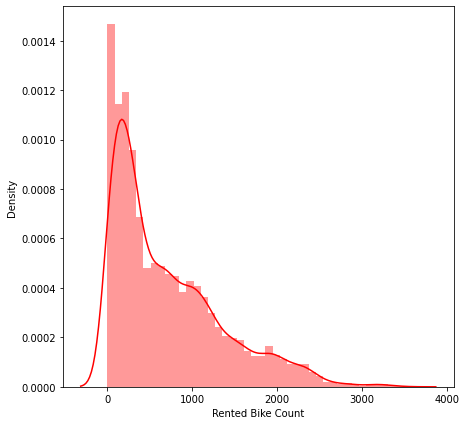

In [12]:
#Dependent variable 'Rented Bike Count
plt.figure(figsize=(7,7))
sns.distplot(df['Rented Bike Count'],color='r')

After plotting the Density plot of number of rented bike,we can see that majority is in between 100 to 1200 rented bikes with an outliers upto 3500.

The density plot is positively skewed thus needs transformation for normalising the distribution of data.

In [13]:
#skewness and kurtosis
print("Skewness: %f" % df['Rented Bike Count'].skew())
print("Kurtosis: %f" % df['Rented Bike Count'].kurt())

Skewness: 1.153428
Kurtosis: 0.853387


Here skewness is 1.168 while the kurtosis is 0.862.

<AxesSubplot:xlabel='Rented Bike Count', ylabel='Density'>

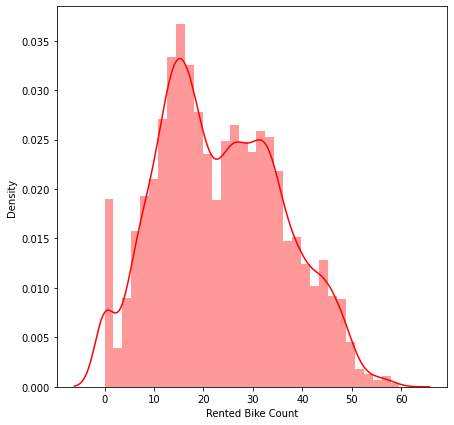

In [14]:
#Reducing Skewness by root squaring target variables.
plt.figure(figsize=(7,7))
sns.distplot(np.sqrt(df['Rented Bike Count']),color='r')

In [15]:
#skewness and kurtosis
print("Skewness after transformation: %f" % np.sqrt(df['Rented Bike Count']).skew())
print("Kurtosis after transformation: %f" % np.sqrt(df['Rented Bike Count']).kurt())

Skewness after transformation: 0.237362
Kurtosis after transformation: -0.657201


After root squaring the target variable,we are able to reduce the Skewness to 0.25 and Kurtosis to -0.64.

*Analysing the correlation between different numerical variables.*

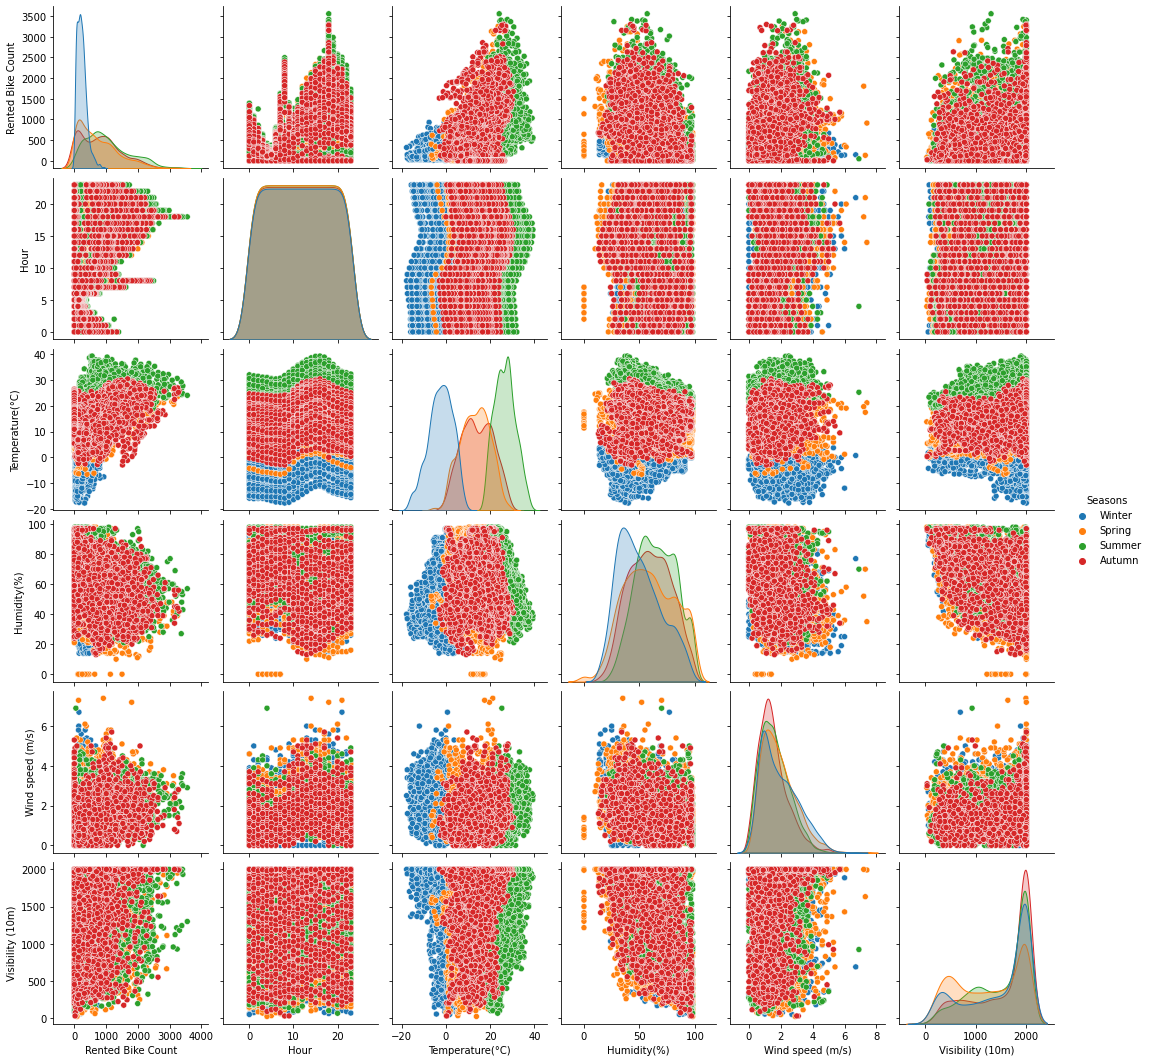

In [16]:
#Relation Between Two Numerical Variables
sns.pairplot(df,vars=['Rented Bike Count','Hour','Temperature(°C)','Humidity(%)','Wind speed (m/s)','Visibility (10m)',], hue='Seasons')


*First we need to convert the Date columns from string to date time format for data processing.*

In [17]:
# Write your code to make your dataset analysis ready.
#Convert the Date column in Datetime Dtype
df['Date']=pd.to_datetime(df['Date'])

#Breaking Down the Date into 3 Components
df['Day']=df['Date'].dt.day
df['Month']=df['Date'].dt.month
df['Year']=df['Date'].dt.year

In [18]:
df.drop(['Date'],axis=1,inplace=True) #Removing Date Column

In [19]:
df.describe().columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Day',
       'Month', 'Year'],
      dtype='object')

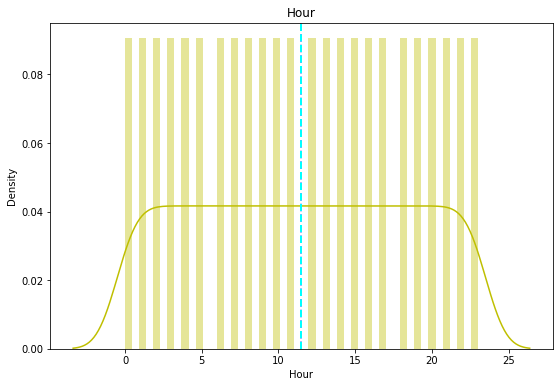

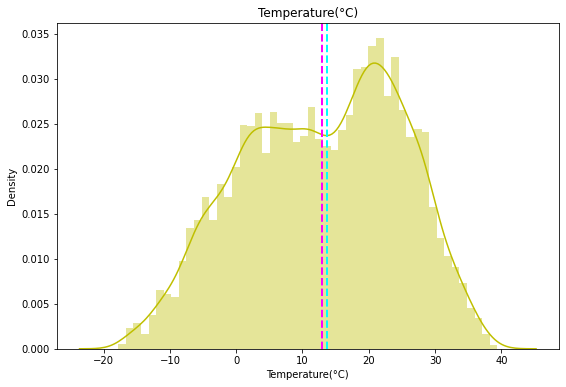

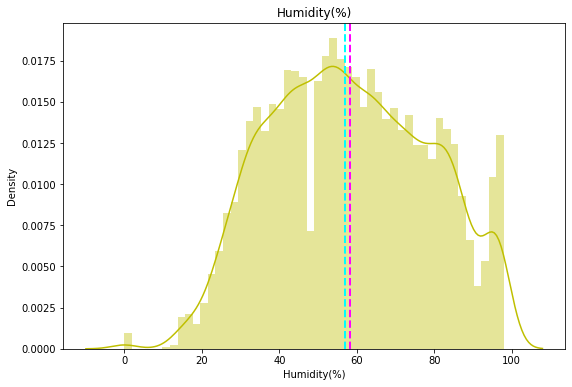

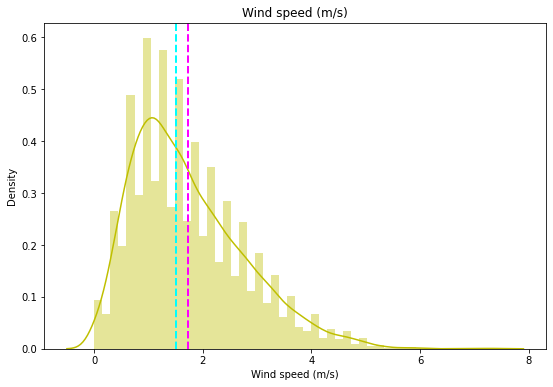

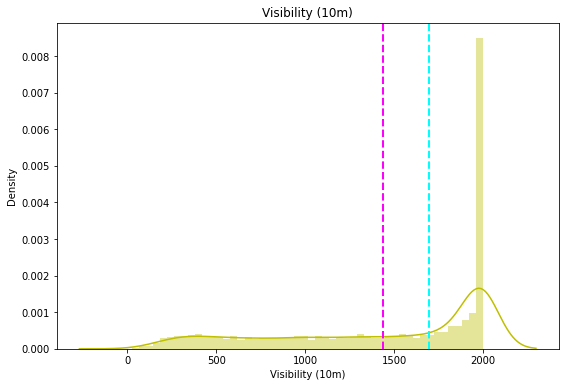

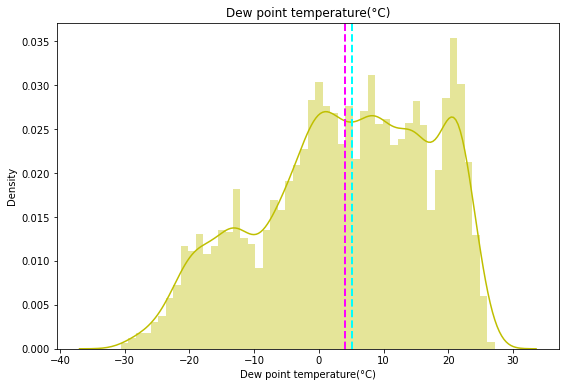

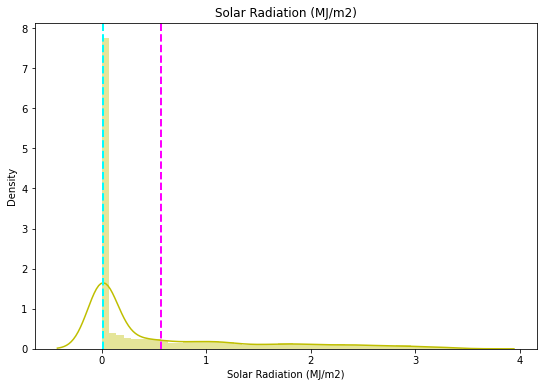

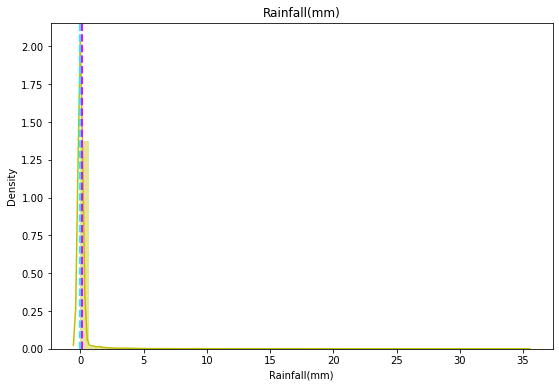

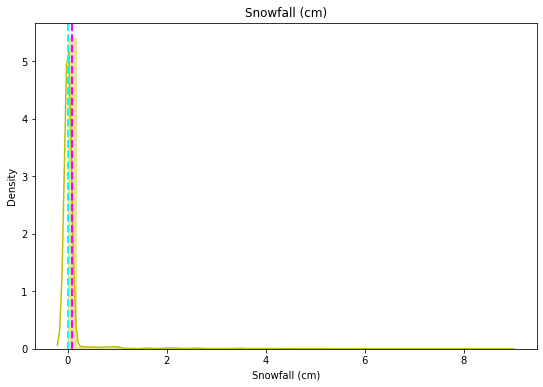

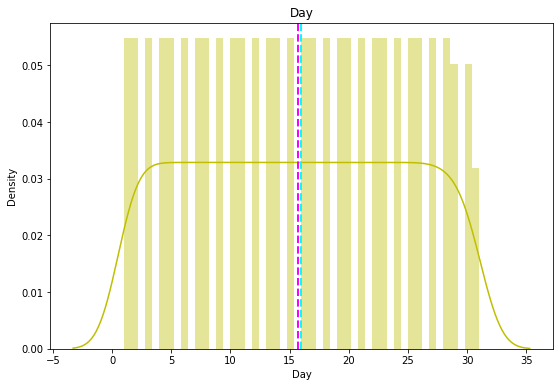

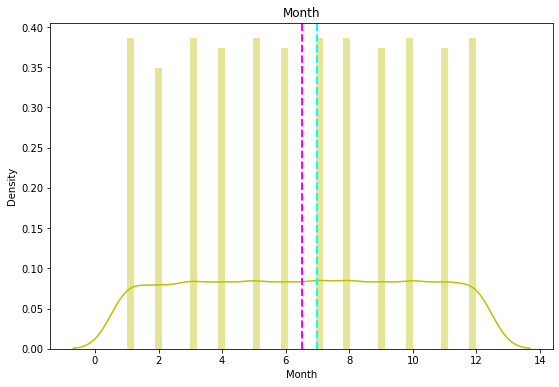

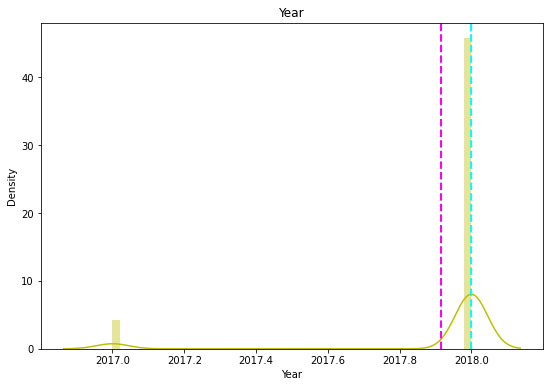

In [20]:
# Chart - 1 visualization code
#Vizualizing Density of various features
numerical_features=df.describe().columns
for col in numerical_features[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    sns.distplot(feature,bins=50, ax = ax,color='y')
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

*By analyzing the density plot of different numerical features,it can be concluded tha*t-

Feature with near normal distribution are-
  
    1-Temperature-(mean-13 degree celcius)

    2-Humidity-(mean-58%)


Feature with skewed distribution are-

    1-Wind Speed-(Mean-1.62 m/s)
   
    2-Visibility-(Mean-1434 10m)

    3-Solar Radiation-(Mean-0.5 MJ/m2)

    4-Rainfall-(Mean-0.1 mm)

    5-Snowfall-(Mean-0.064 cm)

*Analysing the relation of Number of Rented Bike with respect to different numerical features*.

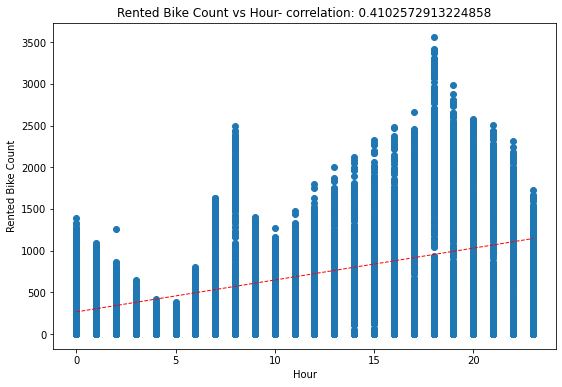

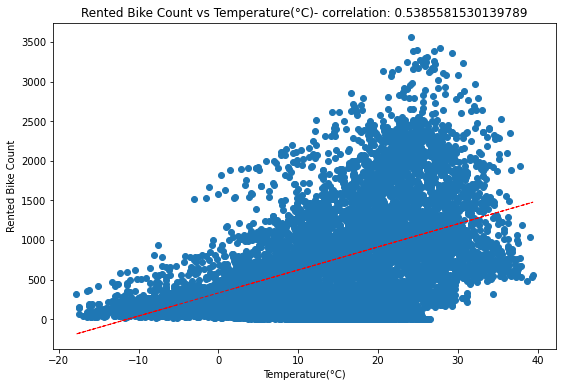

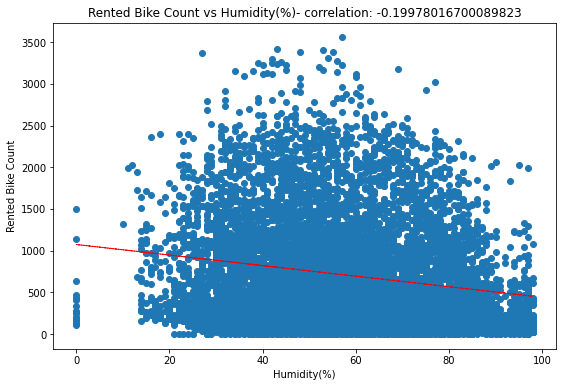

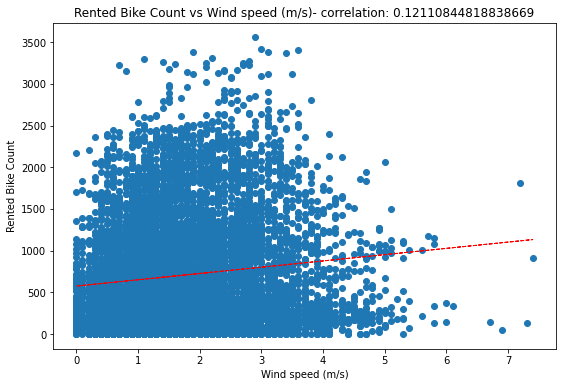

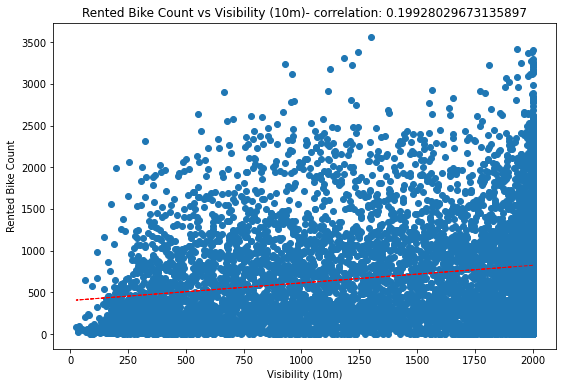

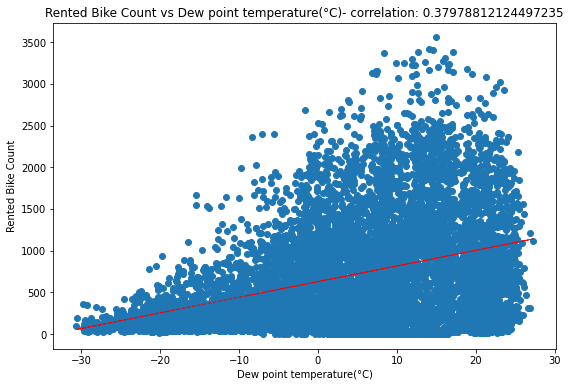

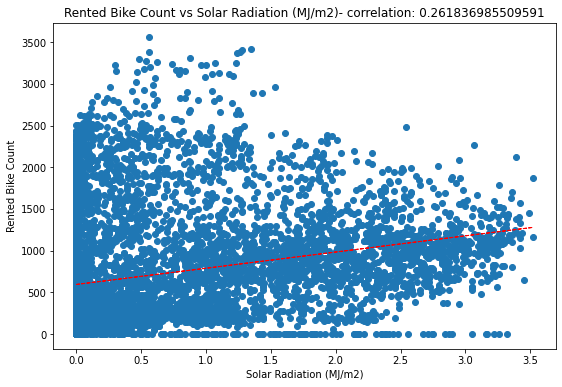

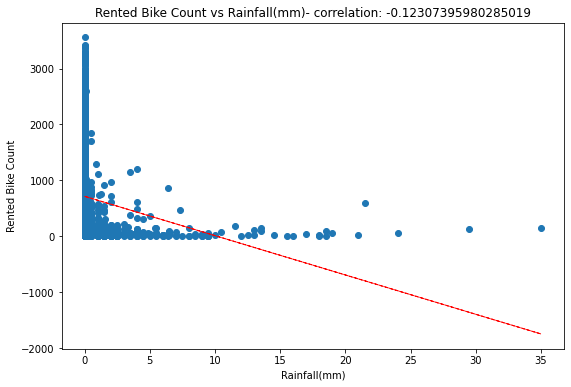

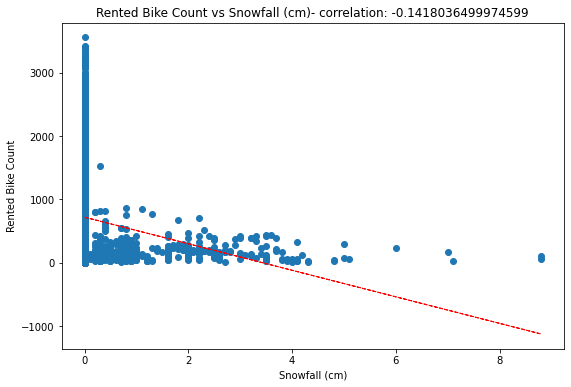

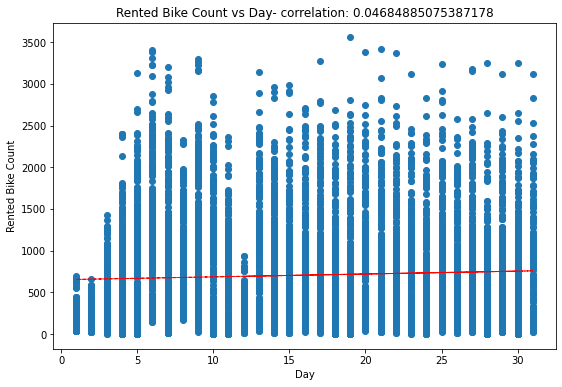

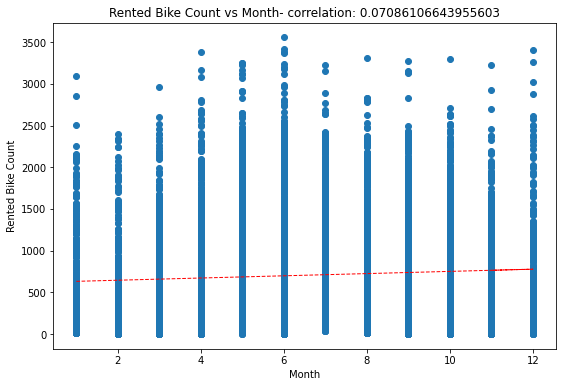

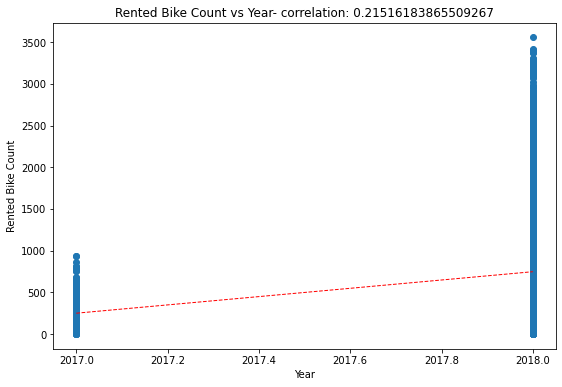

In [21]:
# Chart - 2 visualization code
#Visualizing Relation of Dependent Variable with numerical independent features
for col in numerical_features[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['Rented Bike Count']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Rented Bike Count')
    ax.set_title('Rented Bike Count vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df[col], df['Rented Bike Count'], 1)
    y_hat = np.poly1d(z)(df[col])

    plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

Conclusion-

    1-Most number of bikes rented in between 15 and 20 hrs which shows evening period sees higher demand.
    2-Temperature having 20 to 30 degree celcius sees highest demand of rental bikes(Automn or Summer season).
    3-Humidity with 40 to 70 % with maximum demand.
    4-Lower wind speed increases the demand of Rental Bike.
    5-Demand of rental bikes increased with higher visibility.
    6-Higher dew point temperature with greater demand of Rental Bikes.
    7-Demand decreases with higher Solar Radiations.
    8-Demand decreases during higher Rainfall and Snowfall.

**Data Processing and Feature Engineering**

In [22]:
#Removing Outliers
df=df[df['Wind speed (m/s)']<=4]
df=df[df['Visibility (10m)']>=100]
df=df[df['Solar Radiation (MJ/m2)']<=3]
df=df[df['Rainfall(mm)']<=10]
df=df[df['Snowfall (cm)']<=4]

**Analyzing the relation between rental bike count and numerical features**

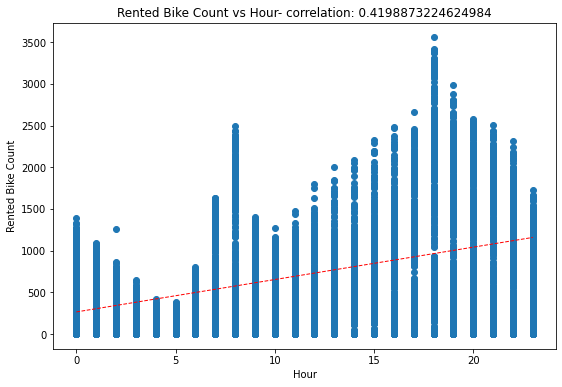

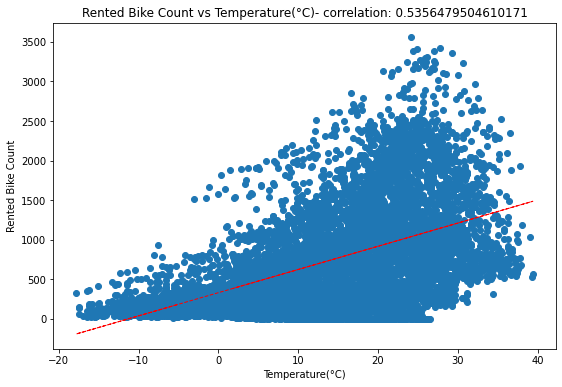

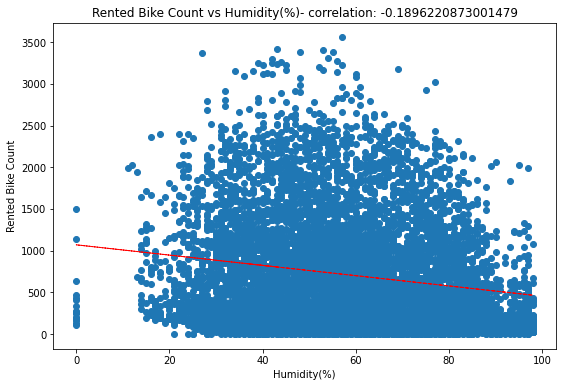

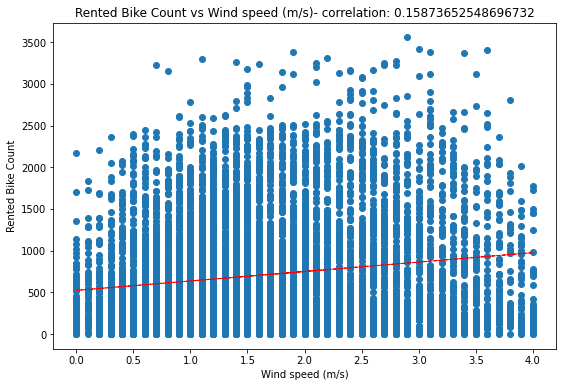

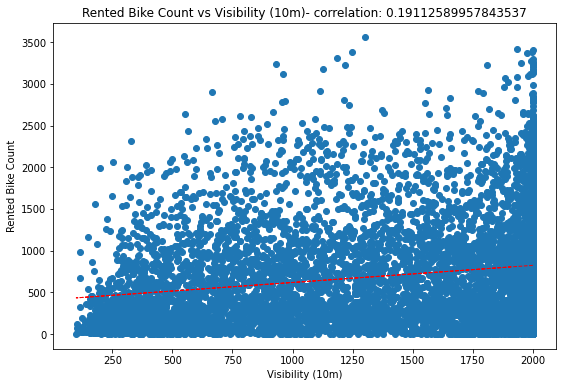

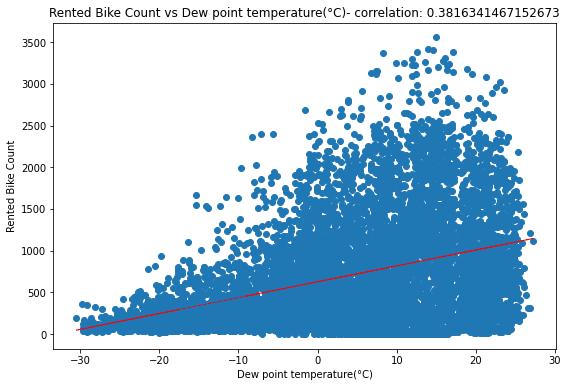

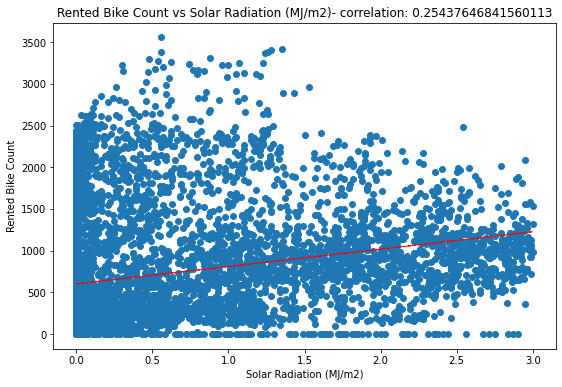

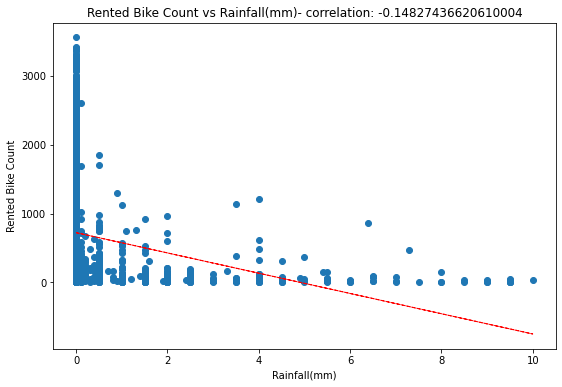

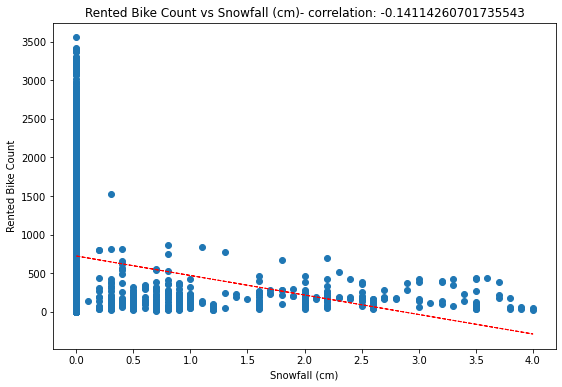

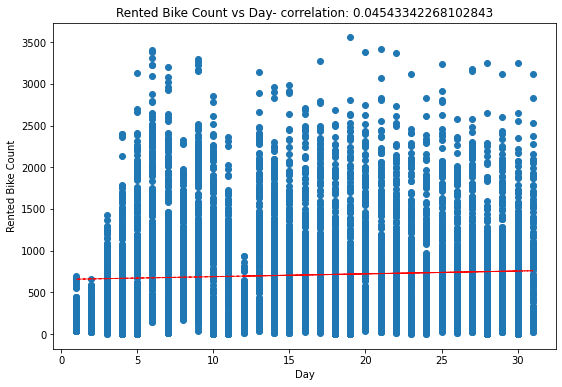

In [23]:
# Chart - 2 visualization code
#Vizualizing Relation between categorical features with Dependent Variables
for col in numerical_features[1:-2]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['Rented Bike Count']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Rented Bike Count')
    ax.set_title('Rented Bike Count vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df[col], df['Rented Bike Count'], 1)
    y_hat = np.poly1d(z)(df[col])

    plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

**Analysing Categorical features**

In [24]:
df['Seasons'].value_counts()

Autumn    2132
Summer    2099
Spring    2037
Winter    2026
Name: Seasons, dtype: int64

It can be seen that rental bikes are available evenly in different seasons.

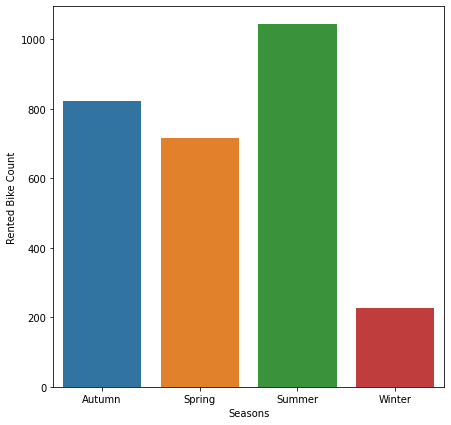

In [25]:
# Chart - 3 visualization code
#ploting Number of Rented bike in different Seasons
bike_rented_per_season=df.groupby(['Seasons'])['Rented Bike Count'].mean()
plt.rcParams['figure.figsize']=(7,7)
sns.barplot(y=bike_rented_per_season,x=bike_rented_per_season.index,data=df)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

We can see that demand of Rental Bikes are higher in Automn and Summer Season with average 800 and 1050 respectively while the Winter seen the list minimum demand of nearly 200.

In [26]:
df['Holiday'].value_counts()

No Holiday    7891
Holiday        403
Name: Holiday, dtype: int64

Here data show the clearly working days are much more than Holidays.

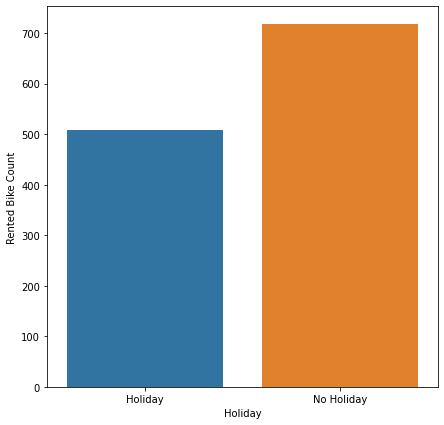

In [27]:
#Visualizing Number of Rented Bike on the Basis of Holiday
bike_rented_on_holiday=df.groupby(['Holiday'])['Rented Bike Count'].mean()
plt.rcParams['figure.figsize']=(7,7)
sns.barplot(y=bike_rented_on_holiday,x=bike_rented_on_holiday.index,data=df)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

From the bar chart ,it can be clearly seen that demand of Rental bikes are more on working days.

In [28]:
df['Functioning Day'].value_counts()

Yes    8016
No      278
Name: Functioning Day, dtype: int64

Here we can be seen that Functioning Days are much more than the non functioning days.

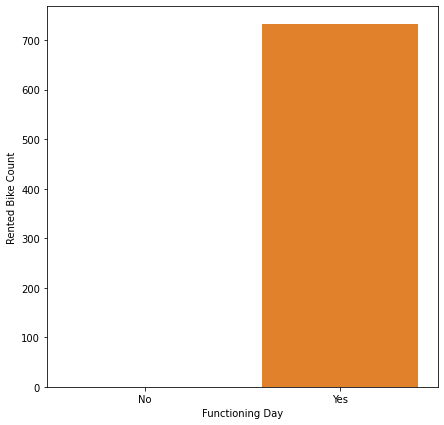

In [29]:
bike_rented_on_functioning_day=df.groupby(['Functioning Day'])['Rented Bike Count'].mean()
plt.rcParams['figure.figsize']=(7,7)
sns.barplot(y=bike_rented_on_functioning_day,x=bike_rented_on_functioning_day.index,data=df)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

*Analysing the correlation among different variables.*

<AxesSubplot:>

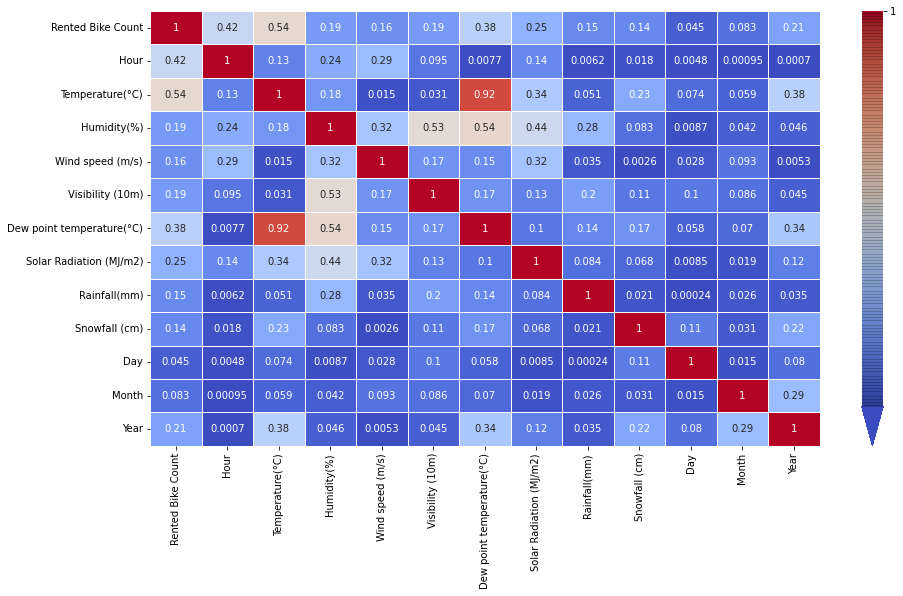

In [30]:
# Chart - 4 visualization code
#Visualizing the correlation among different variable
plt.figure(figsize=(15,8))
cbar_kws = { 
            "shrink":1,
            'extend':'min', 
            'extendfrac':0.1, 
            "ticks":np.arange(0,22), 
            "drawedges":True,
           }
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm',linewidth=1,cbar_kws=cbar_kws)

From the heatmap it can be seen that-

    1-Majority of the features are not correlated with each others.

    2-Temperature has the highest correlation with Dew Point Temperatures.

    3-While humidity is also highly correlated with visibility.

Identifying correlating variables with the help of variance inflation factor to get clear pictures..

In [31]:
#Treating Correlating Variables
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(x):
  vif=pd.DataFrame()
  vif['variable']=x.columns
  vif['vif']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
  return (vif)

In [32]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','Day','Month','Year']]])

,variable,vif
0,Hour,4.284826
1,Temperature(°C),33.527555
2,Humidity(%),5.622824
3,Wind speed (m/s),5.232007
4,Visibility (10m),9.053830
5,Dew point temperature(°C),17.385653
6,Solar Radiation (MJ/m2),2.662726
7,Rainfall(mm),1.120678
8,Snowfall (cm),1.125476


In [33]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','Day','Month','Year','Dew point temperature(°C)']]])

,variable,vif
0,Hour,3.827394
1,Temperature(°C),3.186630
2,Humidity(%),5.101738
3,Wind speed (m/s),4.971409
4,Visibility (10m),4.780098
5,Solar Radiation (MJ/m2),2.115374
6,Rainfall(mm),1.117794
7,Snowfall (cm),1.125261


Removing the Dew Point Temperature.

In [34]:
df.drop(['Dew point temperature(°C)'],axis=1,inplace=True)

In [35]:
numerical_features=['Hour','Temperature(°C)','Humidity(%)','Wind speed (m/s)','Visibility (10m)','	Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)']

Let see,the correlation between variables after its treatment.

<AxesSubplot:>

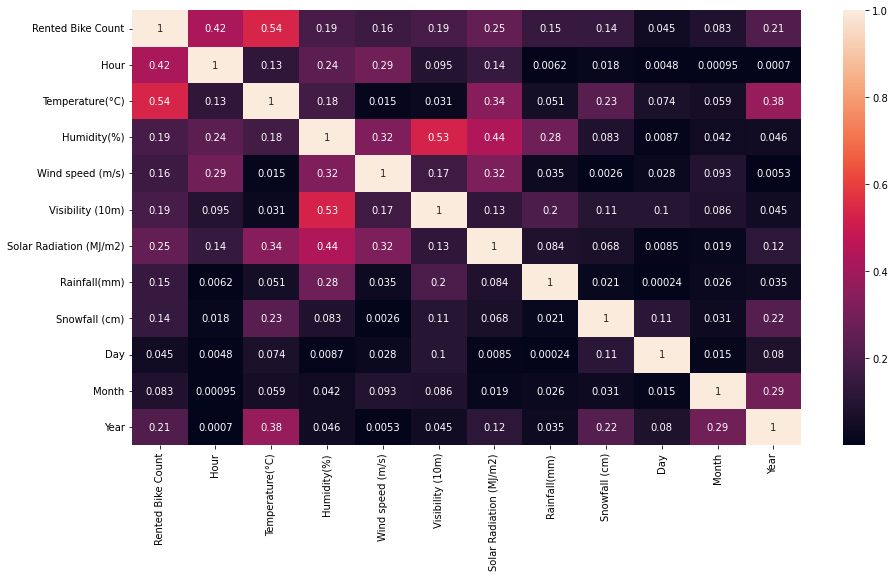

In [36]:
#Visualizing Correlation after treatment
plt.figure(figsize=(15,8))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True)

In [37]:
categorical_features=df.describe(include=['object','category']).columns

In [38]:
numerical_features

['Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 '\tSolar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)']

*Analysing the number of rented bike with respect to the different categorical features.*

First of all we ll plot the boxplot and analyse the density as well as outliers.

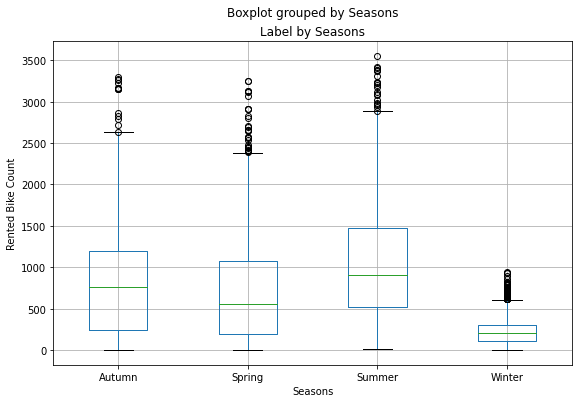

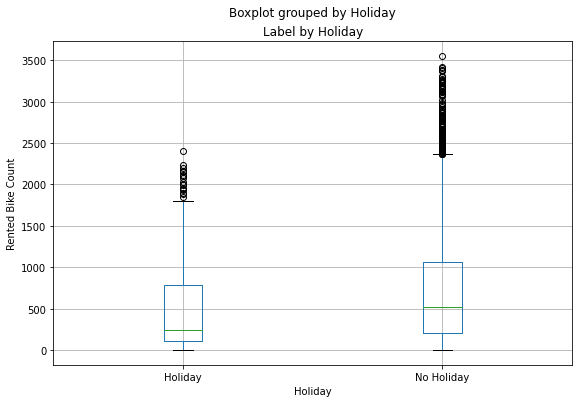

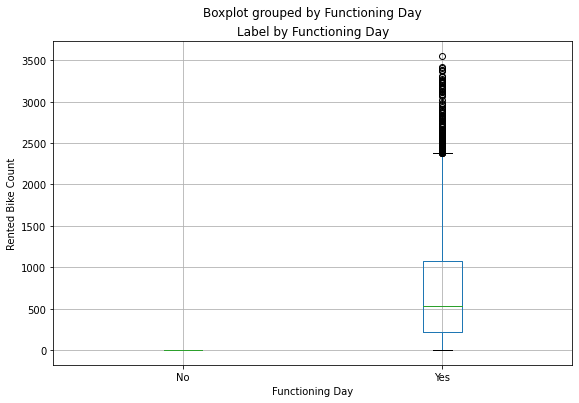

In [39]:
#Visualizing outlier through Boxplot
for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    df.boxplot(column = 'Rented Bike Count', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Rented Bike Count")
plt.show()

After vizualisation we can conclude that-

    1-Maximum demand density of rental bike is in Automn and Summer.
    2-Above features have higher density of outliers,thus removing them could cause the major data lost.

*Encoding the Categorical Data*

Encoding ll help to process the categorical data by assigning them a numerical values.

In [40]:
#Encoding the categorical variables
df_pr=df.copy()
def encoder(data,columns):
  data=pd.concat([data,pd.get_dummies(data[columns],prefix=columns,drop_first=True)],axis=1)
  data=data.drop([columns],axis=1)
  return data

for col in categorical_features:
  df_pr=encoder(df_pr,col)
df_pr.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Day,Month,Year,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,12,1,2017,0,0,1,1,1
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,12,1,2017,0,0,1,1,1
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,12,1,2017,0,0,1,1,1
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,12,1,2017,0,0,1,1,1
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,12,1,2017,0,0,1,1,1


In [41]:
df_pr.drop(['Day','Year'],axis=1,inplace=True)

In [42]:
df_pr.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Month,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,1,0,0,1,1,1
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0,0,1,1,1
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,1,0,0,1,1,1
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,1,0,0,1,1,1
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,1,0,0,1,1,1


## **ML Model Implementation***

Now we ll apply various the Models like-Linear Regression,Random Forest Regression and Polynomial Regression and then after evaluate the results.

*Assigning and Splitting the data for training and testing:*

In [43]:

# ML Model - 1 Implementation
x=df_pr.iloc[:,1:]
y=np.sqrt(df_pr.iloc[:,:1])


# Fit the Algorithm
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)
print(x_train.shape)
print(x_test.shape)

(6220, 14)
(2074, 14)


*Scaling the data*

It help out to get rid of impact of the difference in magnitude of the different features.

In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

**Linear Regression**

*Implementation*

In [45]:
#Implementation
reg=LinearRegression().fit(x_train,y_train)

*Model features*

In [46]:
reg.score(x_train,y_train) 

0.6569562746922146

In [47]:
reg.intercept_

array([-14.72091508])

In [48]:
reg.coef_ #coefficient of parameter

array([[ 11.73241766,  27.22094418, -14.62091948,   1.83189474,
         -0.19318028,  -2.92984416, -32.56436087,   0.92055873,
          0.96778471,  -2.92405102,  -2.48383172,  -8.06933593,
          2.54911072,  28.20450994]])

*Prediction using the model*

In [49]:
#Prediction
y_train_pred=reg.predict(x_train)
y_test_pred=reg.predict(x_test)

*It's performance using Evaluation metric Score Chart.*




*Evaluation of Train Data*

In [50]:
from sklearn.metrics import mean_absolute_error
# Visualizing evaluation Metric Score chart
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#calculate MSE
MSE_lr= mean_squared_error((y_train)**2, (y_train_pred)**2)
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_train**2, y_train_pred**2)
print("MAE :",MAE_lr)



#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score(y_train**2, y_train_pred**2)
print("R2_Score :",r2_lr)
Adjusted_R2_lr = 1-(1-r2_score((y_train)**2, (y_train_pred)**2))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R2 :", Adjusted_R2_lr)

MSE : 179055.6244372282
RMSE : 423.1496478046841
MAE : 286.6083620118309
R2_Score : 0.5879696826347943
Adjusted R2 : 0.5851681166109415


Here the R2_Score is quite low nearly 59% on train data .

In [51]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
training_df=pd.DataFrame(dict1,index=[1])

*Evaluation of Test Data*

In [52]:
MSE_lr=mean_squared_error(((y_test)**2),((y_test_pred)**2)) 
print('MSE',MSE_lr)

MAE_lr=mean_absolute_error(((y_test)**2),((y_test_pred)**2))
print('MAE',MAE_lr)

RMSE_lr=np.sqrt(MSE_lr)
print('RMSE',RMSE_lr)

r2_lr=r2_score(((y_test)**2),((y_test_pred)**2))
print('R2',r2_lr)
Adjusted_R2_lr = 1-(1-r2_score(((y_test)**2), ((y_test_pred)**2)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R2 : ",Adjusted_R2_lr)

MSE 151265.56001222247
MAE 257.7629507878065
RMSE 388.92873384750385
R2 0.6081958418918241
Adjusted R2 :  0.6055318019629681


Here R2_Score is nearly 61% which is very less and generally not acceptable and need further tuning and transformation.

In [53]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
test_df=pd.DataFrame(dict2,index=[1])

*Visualization*

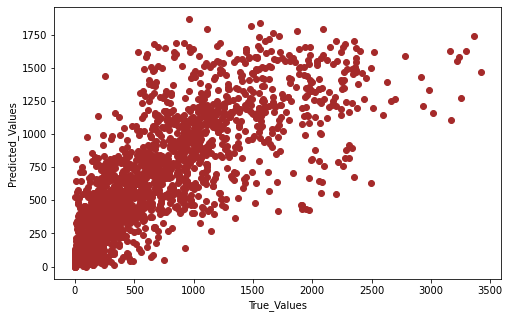

In [54]:
#Visualizing the relation between the predicted value and actual values.
plt.figure(figsize=(8,5))
plt.scatter((y_test**2),((y_test_pred)**2),color='brown')
plt.xlabel('True_Values')
plt.ylabel('Predicted_Values')
plt.show()

From the above scatter plot,we can see that higher values giving more sparse values pointing toward the higher error.

It shows that model is working well for lower values.

In [55]:
error=((y_test)**2)-((y_test_pred)**2)

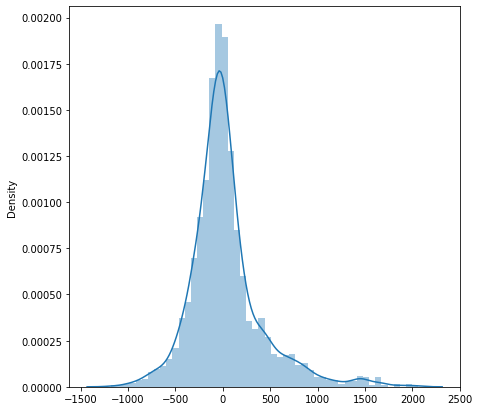

In [56]:
sns.distplot(error)
plt.show()

The above density plot shows the normal distribution of the error,which shows majority of the prediction are having low error.

# Cross- Validation & Hyperparameter Tuning



Now we ll try to penalise the coffiecient parameters to reduce the error.

Here we ll use three method that are Lasso Regression,Ridge Regression and Elastic Regression and Cross validate them

*Lasso Regression*

In [57]:
#Hyperparameter Tuning using Lasso Regression
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.0001,max_iter=8000)
lasso.fit(x_train,y_train) #fitting model

Lasso(alpha=0.0001, max_iter=8000)

In [58]:
lasso.score(x_train,y_train)

0.6569562160212137

In [59]:
lasso.coef_

array([ 11.73345034,  27.20577975, -14.61178642,   1.82808194,
        -0.18874003,  -2.92187376, -32.54220667,   0.90418725,
         0.96740809,  -2.92189719,  -2.47955089,  -8.06884373,
         2.54663784,  28.1995743 ])

*Cross Validation*

In [60]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
#Implementing Cross Validation
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(x_train,y_train) #Fitting the model

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

*Best Lasso Parameter*

In [61]:
#Analysing optimal parameter
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.001}

Using  {'alpha': 0.001}  the negative mean squared error is:  -54.543029485859016


*Fitting the model with best parameter of lasso*

In [62]:
las=Lasso(alpha=0.001,max_iter=3000)
las.fit(x_train,y_train)

Lasso(alpha=0.001, max_iter=3000)

*Prediction using Lasso Model*

In [63]:
#Predicting through model
y_pred_train_lasso=las.predict(x_train) # Prediction on test data
y_pred_test_lasso=las.predict(x_test) # Prediction on test data

*Analysing ERROR*



*Evaluation of Lasso Model on Train Data*

In [64]:
MSE_l= mean_squared_error((y_train)**2, (y_pred_train_lasso)**2)
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


#calculate MAE
MAE_l= mean_absolute_error(y_train**2, y_pred_train_lasso**2)
print("MAE :",MAE_l)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score(y_train**2, y_pred_train_lasso**2)
print("R2_Score :",r2_l)
Adjusted_R2_l = (1-(1-r2_score(y_train**2, y_pred_train_lasso**2))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train**2, y_pred_train_lasso**2))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )

MSE : 179202.84956638011
RMSE : 423.32357549087686
MAE : 286.6918044767054
R2_Score : 0.5876308984336319
Adjusted R2 : 0.5848270288746571


Here also R2_Score is similar to Linear Regression thus not having any major impact of penalization of parameter using Lasso.

In [65]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Lasso regression ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

*Evaluation of Lasso Model on Test Data*

In [66]:
#Evaluation of Lasso Model

MSE_l= mean_squared_error(((y_test)**2), (y_pred_test_lasso)**2)
print("MSE :" , MSE_l)

RMSE_l = np.sqrt(MSE_l)
print("RMSE :" ,RMSE_l)

MAE_l=mean_absolute_error(((y_test)**2), ((y_pred_test_lasso)**2))
print("MAE :",MAE_l)

r2_l= r2_score(((y_test)**2), (y_pred_test_lasso)**2)
print("R2 :" ,r2_l)
Ajusted_R2_l=1-(1-r2_score(((y_test)**2), (y_pred_test_lasso)**2))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R2 : ",Ajusted_R2_l)

MSE : 151383.98604043454
RMSE : 389.08095049800954
MAE : 257.8347271899997
R2 : 0.6078890978432911
Adjusted R2 :  0.6052229722336777


Here we can see the slight increase in R2_Score to 60% on test data which shows that model is not working well.

In [67]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Lasso regression ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),2),
       }
test_df=test_df.append(dict2,ignore_index=True)

*Visualization*

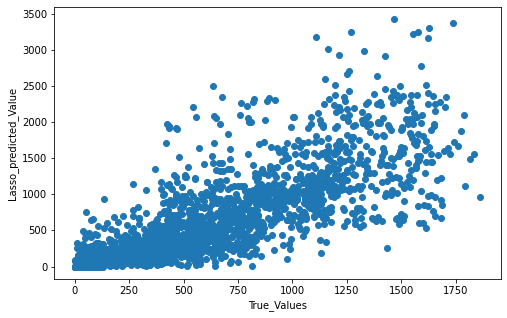

In [68]:
#Visualizing the accuracy of Predicted value with True Value
plt.figure(figsize=(8,5))
plt.scatter((y_pred_test_lasso)**2,(y_test)**2)
plt.xlabel('True_Values')
plt.ylabel('Lasso_predicted_Value')
plt.show()

After visualizing the above ScatterPlot ,we can see increase in linearity of the relationship between True Values and Predicted Values which shows the reduction in error compared to simple Linear Regression Model.

**Ridge Regression**

In [69]:
#Hyperparameter tuning using Ridge Regression
from sklearn.linear_model import Ridge
parameters={'alpha' : [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100,0.1]}
ridge_regressor=GridSearchCV(Ridge(),parameters,scoring='neg_mean_squared_error',cv=3)
ridge_regressor.fit(x_train,y_train) #Fitting the model

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100, 0.1]},
             scoring='neg_mean_squared_error')

*Best Parameter on Ridge Regression*

In [70]:
#Analysing the optimal parameters
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -54.498076363828034


*Prediction using Ridge Regression*

In [71]:
#Prediction using Ridge Regression
y_pred_train_ridge=ridge_regressor.predict(x_train) #prediction on training data
y_pred_test_ridge=ridge_regressor.predict(x_test) #Prediction on test data

*Evaluation of Ridge Regression on Train Data*

In [72]:
#Evaluation of model(Ridge)
MSE_r  = mean_squared_error((y_train)**2, (y_pred_train_ridge)**2)
print("MSE :" , MSE_r)

RMSE_r = np.sqrt(MSE_r)
print("RMSE :" ,RMSE_r)

#calculate MAE
MAE_r= mean_absolute_error(y_train**2, y_pred_train_ridge**2)
print("MAE :",MAE_r)

r2_r = r2_score((y_train)**2, (y_pred_train_ridge)**2)
print("R2 :" ,r2_r)
Adjusted_R2_r = 1-(1-r2_score((y_train)**2, (y_pred_train_ridge)**2))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R2 : ",1-(1-r2_score((y_train)**2, (y_pred_train_ridge)**2))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

MSE : 179059.72494289814
RMSE : 423.15449299623197
MAE : 286.6113329320637
R2 : 0.5879602468370758
Adjusted R2 :  0.5851586166552978


On train data,the R2_Score is nearly 58% which shows that just like lasso ,ridge also not able to put major impact on accuracy.

In [73]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Ridge regression ',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [74]:
#Evaluating model
MAE_r  = mean_absolute_error(((y_test)**2), (y_pred_test_ridge)**2)
print("MSE :" , MAE_r)

MSE_r  = mean_squared_error(((y_test)**2), (y_pred_test_ridge)**2)
print("MSE :" , MSE_r)


RMSE_r = np.sqrt(MSE_r)
print("RMSE :" ,RMSE_r)

r2_r= r2_score(((y_test)**2),(y_pred_test_ridge)**2)
print("R2 :" ,r2_r)
Adjusted_R2_r= 1-(1-r2_score((y_test),(y_pred_test_ridge)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R2 : ",1-(1-r2_score((y_test),(y_pred_test_ridge)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

MSE : 257.7655631841558
MSE : 151268.81892645193
RMSE : 388.93292342825896
R2 : 0.6081874007361114
Adjusted R2 :  0.667722775036558


On test data,here the R2_Score on test is nearly 60% lesser than Lasso Regression.

In [75]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Ridge regression ',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)}
test_df=test_df.append(dict2,ignore_index=True)

*Visualization*

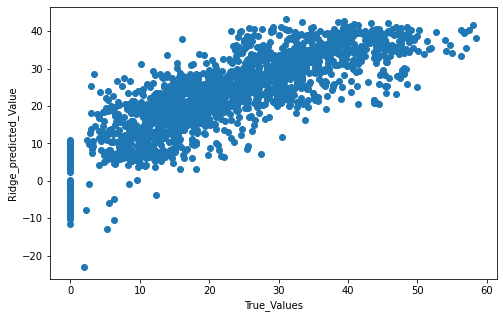

In [76]:
#Visualizing the accuracy of Predicted value with True Value
plt.figure(figsize=(8,5))
plt.scatter((y_test),np.array(y_pred_test_ridge))
plt.xlabel('True_Values')
plt.ylabel('Ridge_predicted_Value')
plt.show()

Here we can see from the above Scatter plot is decrease in density compared to the Lasso Regression which point toward the decrease in Accuracy.

**ElasticNet**

In [77]:
#HyperparameterTuning using ElasticNet
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [78]:
elasticnet.fit(x_train,(y_train)) #Fitting the model

ElasticNet(alpha=0.1)

In [79]:
elasticnet.score(x_train, (y_train)) #Evaluating the model

0.5071299839634926

*Prediction using Elasticnet*

In [80]:
#get the X_train and X-test value
y_pred_train_en=elasticnet.predict(x_train)
y_pred_test_en=elasticnet.predict(x_test)

Evaluation of Elastic Net on Train Data

In [81]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_e= mean_squared_error((y_train)**2, (y_pred_train_en)**2)
print("MSE :",MSE_e)

#calculate RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)


#calculate MAE
MAE_e= mean_absolute_error(y_train, y_pred_train_en)
print("MAE :",MAE_e)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_e= r2_score(y_train**2, y_pred_train_en**2)
print("R2 :",r2_e)
Adjusted_R2_e=(1-(1-r2_score(y_train**2, y_pred_train_en**2))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train**2, y_pred_train_en**2))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )

MSE : 250026.20435776963
RMSE : 500.02620367113724
MAE : 6.939835326156891
R2 : 0.4246571329164536
Adjusted R2 : 0.42074513673424396


Here we can see that R2_Score even dipped to 42% which is totally unacceptable.

In [82]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Elastic net regression ',
       'MAE':round((MAE_e),3),
       'MSE':round((MSE_e),3),
       'RMSE':round((RMSE_e),3),
       'R2_score':round((r2_e),3),
       'Adjusted R2':round((Adjusted_R2_e ),2)}
training_df=training_df.append(dict1,ignore_index=True)

*Evaluation of Elastic Net on Test Data*

In [83]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_e= mean_squared_error(y_test**2, y_pred_test_en**2)
print("MSE :",MSE_e)

#calculate RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)


#calculate MAE
MAE_e= mean_absolute_error(y_test**2, y_pred_test_en**2)
print("MAE :",MAE_e)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_e= r2_score((y_test)**2, (y_pred_test_en)**2)
print("R2 :",r2_e)
Adjusted_R2_e=(1-(1-r2_score((y_test)**2, (y_pred_test_en)**2))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test)**2, (y_pred_test_en)**2))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )

MSE : 214255.70282440094
RMSE : 462.8776326680745
MAE : 317.054391701325
R2 : 0.4450403961205248
Adjusted R2 : 0.4412669942485905


Here in test data,R2_Score increased which shows that the model is not working properly on this dataset.

In [84]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Elastic net regression Test',
       'MAE':round((MAE_e),3),
       'MSE':round((MSE_e),3),
       'RMSE':round((RMSE_e),3),
       'R2_score':round((r2_e),3),
       'Adjusted R2':round((Adjusted_R2_e ),2)}
test_df=test_df.append(dict2,ignore_index=True)

**Random Forest Classifier**

*Implementation of Random Forest Regressor*

In [85]:
# Implementation the model
from sklearn.ensemble import RandomForestRegressor

In [86]:
rf = RandomForestRegressor() #Initializing the model
grid_search = GridSearchCV(estimator = rf, param_grid = {'n_estimators':[50,80,100],'max_depth':[3,5,7]}, cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(x_train,y_train) #fitting the model

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7], 'n_estimators': [50, 80, 100]},
             verbose=2)

*Prediction using Random Forest Regressor*

In [87]:
# predicting for both train and test
y_pred_train_r=grid_search.predict(x_train) #Prediction with Train Data
y_pred_test_r=grid_search.predict(x_test)  #Prediction with Test Data


*Evaluation of Random Forest Regressor on Train Data*

In [88]:
#import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",grid_search.score(x_train,y_train))

#calculate MSE
MSE_rf= mean_squared_error(y_train**2, y_pred_train_r**2)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(y_train**2, y_pred_train_r**2)
print("MAE :",MAE_rf)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_rf= r2_score(y_train**2, y_pred_train_r**2)
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score(y_train**2, y_pred_train_r**2))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train**2, y_pred_train_r**2))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )

Model Score: 0.8747035278433316
MSE : 76570.41553341578
RMSE : 276.7135983890488
MAE : 172.60077050959435
R2 : 0.823801499047134
Adjusted R2 : 0.8226034519304073


Here we can see the drastic increase of R2_Score to 83% which is very much acceptable.

*Visualization*

Text(0, 0.5, 'Predicted Values')

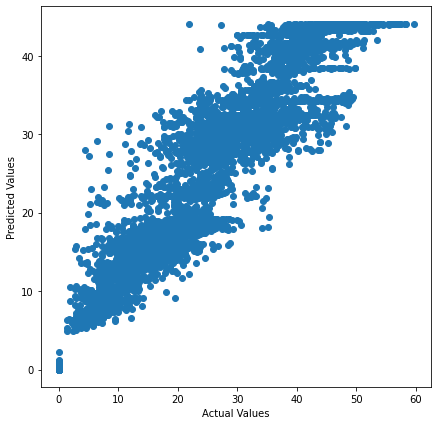

In [89]:
#Visualizing the accuracy of predicted train data with respect to actual train data
plt.scatter(y_train,y_pred_train_r)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [90]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Random forest regression ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
training_df=training_df.append(dict1,ignore_index=True)

*Evaluation of Random Forest Regressor on Test Data*

In [91]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_rf= mean_squared_error(y_test**2, y_pred_test_r**2)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(y_test**2, y_pred_test_r**2)
print("MAE :",MAE_rf)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_rf= r2_score((y_test)**2, (y_pred_test_r)**2)
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score((y_test)**2, (y_pred_test_r)**2))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test)**2, (y_pred_test_r)**2))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )

MSE : 78502.4851503083
RMSE : 280.1829494282411
MAE : 173.47518635130655
R2 : 0.7966648845829092
Adjusted R2 : 0.7952823243032398


Here we are getting best good result with R2_Score 80% on test data,much better than the Lasso,Linear Regression

In [92]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Random forest regression ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
test_df=test_df.append(dict2,ignore_index=True)

In [93]:
from sklearn.metrics import roc_auc_score,confusion_matrix,accuracy_score

*Visualization*

Text(0, 0.5, 'Predicted Values')

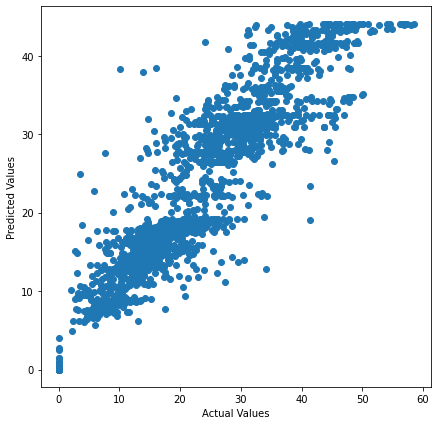

In [94]:
#Visualizing the accuracy of predicted test data with respect to actual test data
plt.scatter(y_test,y_pred_test_r)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

From the scatter plot,we can see the linearity of the relationship between Predicted Values and Actual Values which shows high accuracy and increase in variance with respect to testing data.

**Grid Search CV**

In [95]:
#Cross Validation And Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV 

In [96]:
parameters = {'criterion':['squared_error', 'absolute_error', 'poisson'],'max_features':['auto', 'sqrt', 'log2']}

In [97]:
#Performing the grid search using the parameters with cv of 5
grid = GridSearchCV(rf,parameters,cv=5,scoring='neg_mean_squared_error')
#Fitting it on our training dataset
grid.fit(x_train,y_train) #fitting the model

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'max_features': ['auto', 'sqrt', 'log2']},
             scoring='neg_mean_squared_error')

*Optimal Parameters*

In [98]:
grid.best_params_ #Optimal Parameter

{'criterion': 'squared_error', 'max_features': 'auto'}

In [99]:
gs_cv=RandomForestRegressor(n_estimators=100,random_state=0,criterion='squared_error',max_features='auto',max_depth=15) #Initializing Tuned optimal model

In [100]:
gs_cv.fit(x_train,y_train) #fitting the model

RandomForestRegressor(max_depth=15, max_features='auto', random_state=0)

*Prediction on Model*

In [101]:
y_pred_train_cv=gs_cv.predict(x_train) #Prediction on Train Data

In [102]:
y_pred_test_cv=gs_cv.predict(x_test) #Prediction on Test Data

*Evaluation Grid Search on Train Data*

In [103]:
#import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",gs_cv.score(x_train,y_train))

#calculate MSE
MSE_cv= mean_squared_error(y_train**2, y_pred_train_cv**2)
print("MSE :",MSE_cv)

#calculate RMSE
RMSE_cv=np.sqrt(MSE_cv)
print("RMSE :",RMSE_cv)


#calculate MAE
MAE_cv= mean_absolute_error(y_train**2, y_pred_train_cv**2)
print("MAE :",MAE_cv)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_cv= r2_score(y_train**2, y_pred_train_cv**2)
print("R2 :",r2_cv)
Adjusted_R2_cv=(1-(1-r2_score(y_train**2, y_pred_train_cv**2))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train**2, y_pred_train_cv**2))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )


Model Score: 0.9790949334189807
MSE : 13189.256143605795
RMSE : 114.8444867793217
MAE : 69.74456482381568
R2 : 0.9696498034521891
Adjusted R2 : 0.9694434398039767


This gave the best result with R2_Score 97% on train data which is tending toward the overfitting.

In [104]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Random forest Regression-Cross Validation ',
       'MAE':round((MAE_cv),3),
       'MSE':round((MSE_cv),3),
       'RMSE':round((RMSE_cv),3),
       'R2_score':round((r2_cv),3),
       'Adjusted R2':round((Adjusted_R2_cv ),2)}
training_df=training_df.append(dict1,ignore_index=True)

*Visualization*

Text(0, 0.5, 'Predicted Value')

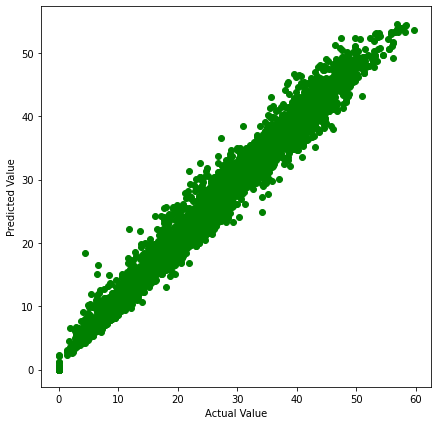

In [105]:
#Visualizing the accuracy of predicted train value with respect to actual train value
plt.scatter(y_train,y_pred_train_cv,color='g')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')

Very high linearity and low variance looking like it overfit on train data.

*Evaluation of GridSearchCV on Test Data*

In [106]:
#import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",gs_cv.score(x_test,y_test))

#calculate MSE
MSE_cv= mean_squared_error(y_test**2, y_pred_test_cv**2)
print("MSE :",MSE_cv)

#calculate RMSE
RMSE_cv=np.sqrt(MSE_cv)
print("RMSE :",RMSE_cv)


#calculate MAE
MAE_cv= mean_absolute_error(y_test**2, y_pred_test_cv**2)
print("MAE :",MAE_cv)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_cv= r2_score(y_test**2, y_pred_test_cv**2)
print("R2_Score:",r2_cv)
Adjusted_R2_cv=(1-(1-r2_score(y_test**2, y_pred_test_cv**2))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_test**2, y_pred_test_cv**2))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )

Model Score: 0.8945480554374176
MSE : 51334.990061249824
RMSE : 226.5722623386407
MAE : 135.77796833136017
R2_Score: 0.8670334307372122
Adjusted R2 : 0.8661293355600975


Here on Test Data,this model is giving the best result of R2_Score nearly 87% which makes it most suitable model to implement.

In [107]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Random forest regression-Cross Validation ',
       'MAE':round((MAE_cv),3),
       'MSE':round((MSE_cv),3),
       'RMSE':round((RMSE_cv),3),
       'R2_score':round((r2_cv),3),
       'Adjusted R2':round((Adjusted_R2_cv ),2)}
test_df=test_df.append(dict2,ignore_index=True)

*Visualization*

Text(0, 0.5, 'Predicted Value')

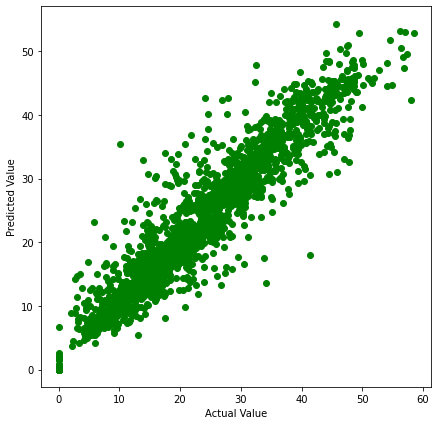

In [108]:
#Visualizing the accuracy of predicted test value with respect to actual test value
plt.scatter(y_test,y_pred_test_cv,color='g')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')

The above scatter plot shows the increase in linearity and variance with a high accuracy of predicted values with respect to actual values.

**Polynomial Regression**

*Implementation*

In [109]:
from sklearn.preprocessing import PolynomialFeatures
# ML Model - 3 Implementation

# Defining the variables
dependent_variable = 'Rented Bike Count'
independent_variables = list(set(df_pr.columns[1:].tolist()) - {dependent_variable})

x=df_pr.iloc[:,1:]
y=np.sqrt(df_pr.iloc[:,:1])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
poly_features = PolynomialFeatures(degree=2) #Initializing the model
x_train_poly = poly_features.fit_transform(x_train)
poly_model = LinearRegression() 
poly_model.fit(x_train_poly, y_train) #fitting the model
y_pred_train_p = poly_model.predict(x_train_poly) #Predicting the model on train data
y_pred_test_p = poly_model.predict(poly_features.fit_transform(x_test)) #Predicting the model on test data

*Evaluation of Polynomial Regression*

In [110]:
#import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",poly_model.score(x_train_poly,y_train))

#calculate MSE
MSE_p= mean_squared_error(y_train**2, y_pred_train_p**2)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_p=np.sqrt(MSE_p)
print("RMSE :",RMSE_p)


#calculate MAE
MAE_p= mean_absolute_error(y_train**2, y_pred_train_p**2)
print("MAE :",MAE_p)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_p= r2_score(y_train**2, y_pred_train_p**2)
print("R2 :",r2_p)
Adjusted_R2_p=(1-(1-r2_score(y_train**2, y_pred_train_p**2))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train**2, y_pred_train_p**2))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )

Model Score: 0.7686581465215491
MSE : 78502.4851503083
RMSE : 345.29166572597006
MAE : 227.82009333876925
R2 : 0.7235101846984888
Adjusted R2 : 0.7211556485584516


Polynomial Regression is also doing well in comparison to many model with the R2_Score 72% on Train Data.

In [111]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Polynomial regression ',
       'MAE':round((MAE_p),3),
       'MSE':round((MSE_p),3),
       'RMSE':round((RMSE_p),3),
       'R2_score':round((r2_p),3),
       'Adjusted R2':round((Adjusted_R2_p ),2)}
training_df=training_df.append(dict1,ignore_index=True)

*Visualization*

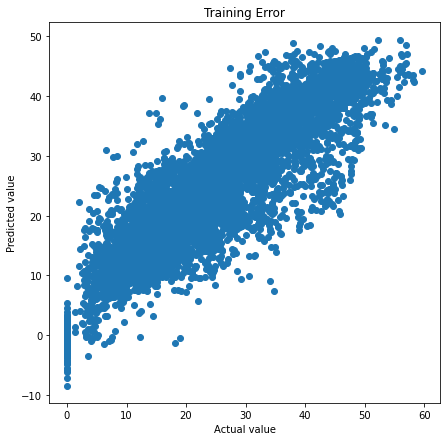

In [112]:
#Vizualizing the predicted train data with respect to the actual train data
plt.scatter(y_train,y_pred_train_p)
plt.xlabel('Actual value'),plt.ylabel('Predicted value')
plt.title('Training Error')
plt.show()

High variance with average bias is accepted model for this data set.

*Evaluation of Polynomial Regression on Test Data*

In [113]:
#calculate MSE
MSE_p= mean_squared_error(y_test**2, y_pred_test_p**2)
print("MSE :",MSE_p)

#calculate RMSE
RMSE_p=np.sqrt(MSE_p)
print("RMSE :",RMSE_p)


#calculate MAE
MAE_p= mean_absolute_error(y_test**2, y_pred_test_p**2)
print("MAE :",MAE_p)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_p= r2_score(y_test**2, y_pred_test_p**2)
print("R2 :",r2_p)
Adjusted_R2_p=(1-(1-r2_score(y_test**2, y_pred_test_p**2))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_test**2, y_pred_test_p**2))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )

MSE : 105751.98047153906
RMSE : 325.1952958939275
MAE : 214.11170538495895
R2 : 0.7276439061228557
Adjusted R2 : 0.7253245719900819


In [114]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Polynomial regression ',
       'MAE':round((MAE_p),3),
       'MSE':round((MSE_p),3),
       'RMSE':round((RMSE_p),3),
       'R2_score':round((r2_p),3),
       'Adjusted R2':round((Adjusted_R2_p ),2)}
test_df=test_df.append(dict2,ignore_index=True)

Visualization

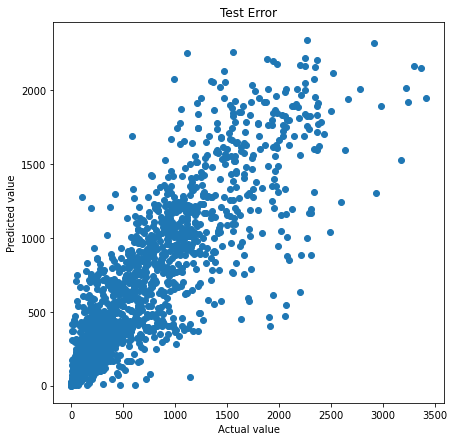

In [115]:
#Vizualising the predicted test data with respect to the actual test data
plt.scatter(y_test**2,y_pred_test_p**2)
plt.xlabel('Actual value'),plt.ylabel('Predicted value')
plt.title('Test Error')
plt.show()

From the above Scatter Plot we can visualize the accuracy of the Predicted Values with respect to Actual Values more scattered than train data shows bit high variance.

<AxesSubplot:ylabel='Density'>

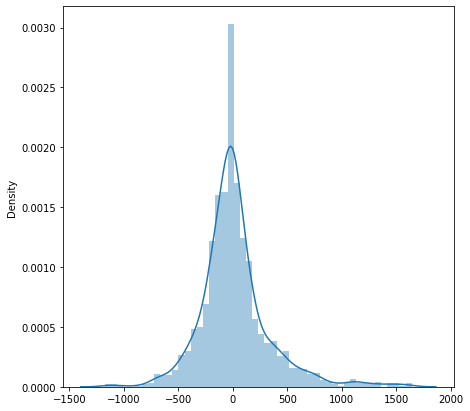

In [116]:
#Visualizing error density
error_poly=((y_test)**2)-((y_pred_test_p)**2)
sns.distplot(error_poly)

In [117]:
print("Skewness: %f" % error_poly.skew())
print("Kurtosis: %f" % error_poly.kurt())

Skewness: 1.210165
Kurtosis: 4.377536


Here we can see that despite skewness is under acceptable range,its Kurtosis is quiet high.

Here Error density follows the normal distribution

# Comparison

*R2_Score*

Text(0, 0.5, 'R2_SCORE')

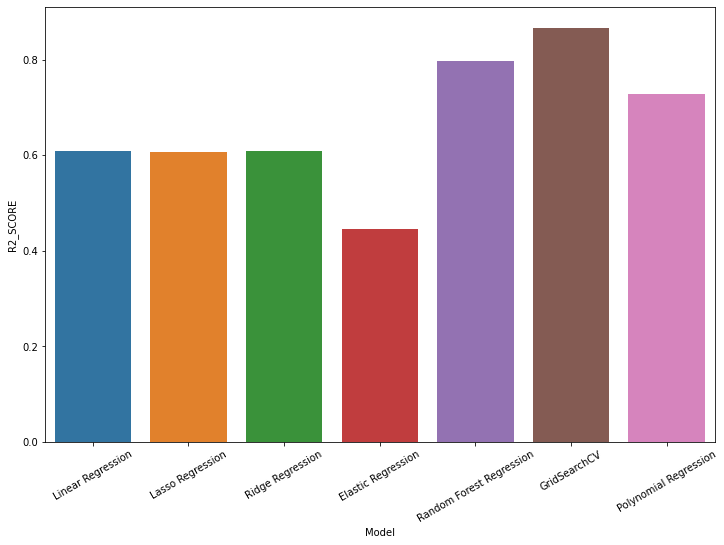

In [118]:
#Comparison of different model with respect to following metrics
#R2_SCORE
model=['Linear Regression','Lasso Regression','Ridge Regression','Elastic Regression','Random Forest Regression','GridSearchCV','Polynomial Regression']
acc=[r2_lr,r2_l,r2_r,r2_e,r2_rf,r2_cv,r2_p]
plt.figure(figsize=(12,8))
sns.barplot(x=model,y=acc)
plt.xlabel('Model')
plt.xticks(rotation=30)
ax.XTickLabelRotation = 45;
plt.ylabel('R2_SCORE')


From the above Barplot we can visualize that Tuned Random forest Regression Model gives the least Mean Squarred Error with less than 60000 while Linear Regression Model gives the Maximum Mean Squared Error with more than 140000.

*Mean Squared Data*

Text(0, 0.5, 'MEAN SQUARE ERROR')

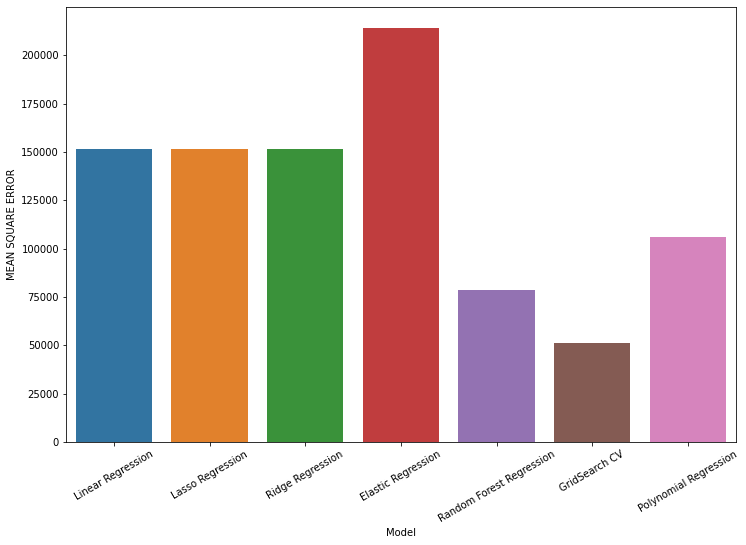

In [119]:
#Comparison of different model with respect to following metrics
#MEAN SQUARE ERROR
model=['Linear Regression','Lasso Regression','Ridge Regression','Elastic Regression','Random Forest Regression','GridSearch CV','Polynomial Regression']
acc=[MSE_lr,MSE_l,MSE_r,MSE_e,MSE_rf,MSE_cv,MSE_p]
plt.figure(figsize=(12,8))
sns.barplot(x=model,y=acc)
plt.xlabel('Model')
plt.xticks(rotation=30)
ax.XTickLabelRotation = 45;
plt.ylabel('MEAN SQUARE ERROR')


If we compare the R2_Score of the different models,we can see that the GridSearchCV gives the maximum accuracy with more than 85% while Elastic Net gives minimum accuracy with less than 50%.

*Comparison of Models on different evaluation metrics*

In [120]:
result=pd.concat([training_df,test_df],keys=['Training set','Test set'])
result

Model      MAE  \
Training set 0                          Linear regression   286.608   
             1                           Lasso regression   286.692   
             2                           Ridge regression   286.611   
             3                     Elastic net regression     6.940   
             4                   Random forest regression   172.601   
             5  Random forest Regression-Cross Validation    69.745   
             6                      Polynomial regression   227.820   
Test set     0                          Linear regression   257.763   
             1                           Lasso regression   257.835   
             2                           Ridge regression   257.766   
             3                 Elastic net regression Test  317.054   
             4                   Random forest regression   173.475   
             5  Random forest regression-Cross Validation   135.778   
             6                      Polynomial regression   214.112   

                       MSE     RMSE  R2_score  Adjusted R2  
Training set 0  179055.624  423.150     0.588         0.59  
             1  179202.850  423.324     0.588         0.58  
             2  179059.725  423.154     0.588         0.59  
             3  250026.204  500.026     0.425         0.42  
             4   76570.416  276.714     0.824         0.82  
             5   13189.256  114.844     0.970         0.97  
             6  119226.334  345.292     0.724         0.72  
Test set     0  151265.560  388.929     0.608         0.61  
             1  151383.986  389.081     0.608         0.58  
             2  151268.819  388.933     0.608         0.67  
             3  214255.703  462.878     0.445         0.44  
             4   78502.485  280.183     0.797         0.80  
             5   51334.990  226.572     0.867         0.87  
             6  105751.980  325.195     0.728         0.73

# Analysing importance of different features

If we take the best fit model the we have to choose here is Random Forest Model then after we ll try to find the importance of the features.

**Grid Search**

In [121]:
#feature importance in tuned random forest classifier
rf_optimal_model=grid_search.best_estimator_
rf_optimal_model

RandomForestRegressor(max_depth=7, n_estimators=50)

In [122]:
rf_optimal_model.feature_importances_

array([0.26835227, 0.29952712, 0.066559  , 0.00145183, 0.00309724,
       0.04317238, 0.0799587 , 0.00060364, 0.00280809, 0.00723017,
       0.00056147, 0.05352824, 0.00118736, 0.17196248])

In [123]:
importances=rf_optimal_model.feature_importances_

In [124]:
importance_dict = {'Feature' : list(x.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [125]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [126]:
importance_df=importance_df.sort_values(by=['Feature Importance'],ascending=False)

In [127]:
importance_df.head(10).reset_index()

,index,Feature,Feature Importance
0,1,Temperature(°C),0.30
1,0,Hour,0.27
2,13,Functioning Day_Yes,0.17
3,6,Rainfall(mm),0.08
4,2,Humidity(%),0.07
5,11,Seasons_Winter,0.05
6,5,Solar Radiation (MJ/m2),0.04
7,9,Seasons_Spring,0.01
8,3,Wind speed (m/s),0.00
9,4,Visibility (10m),0.00


<AxesSubplot:title={'center':'Feature Importance'}, xlabel='Feature Importance', ylabel='Feature'>

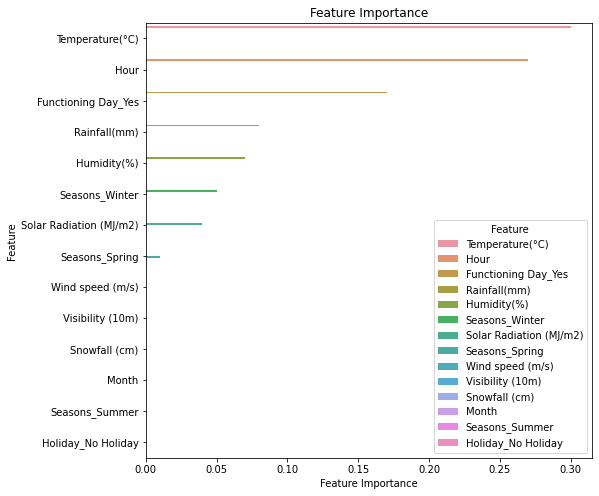

In [128]:

# visualizing feature importance 
plt.figure(figsize=(8,8))
plt.title('Feature Importance')
sns.barplot(x=importance_df['Feature Importance'],y=importance_df['Feature'],hue=importance_df['Feature'])

From the above bar chart we can see that the Temperature and Time(Hour) play the maximum role in affecting the demand of the Rental Bike.

# Conclusion

During the time of our analysis, we initially did EDA on all the features of our datset. We first analysed our dependent variable, 'Rented Bike Count' and also transformed it. Next we analysed categorical variable and dropped the variable who had majority of one class, we also analysed numerical variable, found out the correlation, distribution and their relationship with the dependent variable. We also removed some numerical features who had mostly 0 values and hot encoded the categorical variables.

Next we implemented 6 machine learning algorithms Linear Regression,lasso,ridge,elasticnet,Random Forest and Polynomial Regression. We did hyperparameter tuning to improve our model performance. The results of our evaluation are:

